In [1]:
import sys
sys.path.append("../../ranking/")
sys.path.append("../../tests/")

In [2]:
from rank_variants import RankVariants
from measurements_visualizer import MeasurementsVisualizer
from measurements_simulator import MeasurementsSimulator
import pandas as pd

### Simulate Normal distributions

Specify the mean and standard deviation for each algorithm

In [19]:
cfg = {}
cfg['alg1']  = [0.2,0.02] # [mean, std]
cfg['alg2']  = [0.2,0.01]
cfg['alg3']  = [0.2,0.01]
cfg['alg4']  = [0.19,0.01]
ms = MeasurementsSimulator(cfg, 'normal')    

In [13]:
rep_steps = 20
run_id= 1
ms.measure(rep_steps=rep_steps, run_id=run_id)

In [14]:
alg_measurements = ms.get_alg_measurements()
h0 = list(cfg.keys())

### Visualize data

In [17]:
mv = MeasurementsVisualizer(alg_measurements, h0)

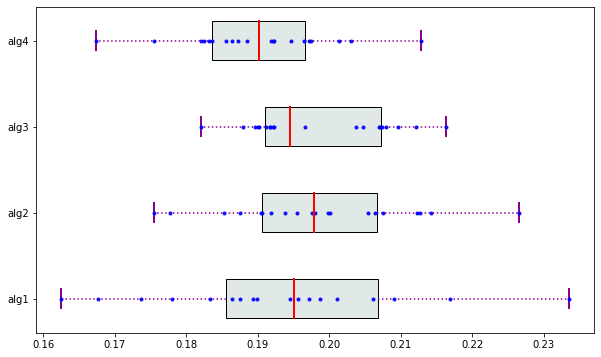

In [18]:
mv.show_measurements_boxplots()

### Algorithm ranking

In [8]:
rank_variants = RankVariants(alg_measurements,h0)

In [9]:
s, mr = rank_variants.calculate_mean_rank()

In [10]:
s

,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q55-q45
case:concept:name,,,,,,,,
alg1,0,0,0,0,0,0,0,1
alg2,0,0,0,0,0,0,0,1
alg3,0,0,0,0,0,0,1,2
alg4,0,0,0,0,0,0,0,0


In [11]:
mr

,case:concept:name,case:mean-rank
3,alg4,0.000
0,alg1,0.125
1,alg2,0.125
2,alg3,0.375
